Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
#from __future__ import print_function

In [3]:
import nsfg
df = nsfg.ReadFemPreg()
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


Print value counts for <tt>birthord</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [4]:
df.birthord.value_counts().sort_index()

1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
Name: birthord, dtype: int64

Print value counts for <tt>prglngth</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [5]:
df.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [6]:
df.prglngth[df.prglngth <= 13].value_counts().sum()

3522L

In [7]:
df.prglngth[(df.prglngth <= 26) & 
           (df.prglngth >= 14)].value_counts().sum()

793L

In [8]:
df.prglngth[df.prglngth >= 27].value_counts().sum()

9278L

Print value counts for <tt>agepreg</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611935).

Looking at this data, please remember my comments in the book about the obligation to approach data with consideration for the context and respect for the respondents.

In [9]:
df.agepreg[(df.agepreg < 20) & 
          (df.outcome != 6)].value_counts().sum()

3182L

In [10]:
df.agepreg[(df.agepreg <= 24) & 
          (df.agepreg >= 20) & 
          (df.outcome != 6)].value_counts().sum()

3528L

In [11]:
df.agepreg[(df.agepreg <= 29) & 
          (df.agepreg >= 25) & 
          (df.outcome != 6)].value_counts().sum()

2697L

In [12]:
df.agepreg[df.agepreg < 20].value_counts().sort_index().cumsum().tail()

19.58    2891
19.66    2969
19.75    3041
19.83    3116
19.91    3182
Name: agepreg, dtype: int64

In [13]:
df.agepreg[(df.agepreg >= 20) & 
          (df.agepreg <= 24)].value_counts().sort_index().cumsum().tail()

23.66    3272
23.75    3341
23.83    3406
23.91    3471
24.00    3528
Name: agepreg, dtype: int64

Compute the mean birthweight.

In [14]:
df.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [15]:
df['totalwgt_kg'] = (0.453592)*df.totalwgt_lb
df.totalwgt_kg.mean()

3.2956309433503437

Look through the codebook and find a variable, other than the ones mentioned in the book, that you find interesting.  Compute values counts, means, or other statistics.

In [16]:
print(list(df.columns))

[u'caseid', u'pregordr', u'howpreg_n', u'howpreg_p', u'moscurrp', u'nowprgdk', u'pregend1', u'pregend2', u'nbrnaliv', u'multbrth', u'cmotpreg', u'prgoutcome', u'cmprgend', u'flgdkmo1', u'cmprgbeg', u'ageatend', u'hpageend', u'gestasun_m', u'gestasun_w', u'wksgest', u'mosgest', u'dk1gest', u'dk2gest', u'dk3gest', u'bpa_bdscheck1', u'bpa_bdscheck2', u'bpa_bdscheck3', u'babysex', u'birthwgt_lb', u'birthwgt_oz', u'lobthwgt', u'babysex2', u'birthwgt_lb2', u'birthwgt_oz2', u'lobthwgt2', u'babysex3', u'birthwgt_lb3', u'birthwgt_oz3', u'lobthwgt3', u'cmbabdob', u'kidage', u'hpagelb', u'birthplc', u'paybirth1', u'paybirth2', u'paybirth3', u'knewpreg', u'trimestr', u'ltrimest', u'priorsmk', u'postsmks', u'npostsmk', u'getprena', u'bgnprena', u'pnctrim', u'lpnctri', u'workpreg', u'workborn', u'didwork', u'matweeks', u'weeksdk', u'matleave', u'matchfound', u'livehere', u'alivenow', u'cmkidied', u'cmkidlft', u'lastage', u'wherenow', u'legagree', u'parenend', u'anynurse', u'fedsolid', u'frsteatd_n',

Create a boolean Series.

In [17]:
df.matleave.value_counts()

0     421
6     230
8     113
12     85
4      70
2      61
10     49
3      37
1      36
5      26
9      24
7      19
16     15
11      8
20      7
24      6
14      5
32      5
15      4
13      4
99      3
25      2
36      2
26      2
19      2
97      1
30      1
18      1
22      1
38      1
40      1
50      1
52      1
17      1
Name: matleave, dtype: int64

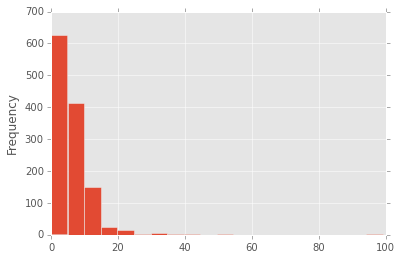

In [18]:
df.matleave.plot(kind='hist',bins=20)

In [19]:
df.matleave.describe()

count    1245.000000
mean        5.340562
std         7.822056
min         0.000000
25%         0.000000
50%         4.000000
75%         8.000000
max        99.000000
Name: matleave, dtype: float64

In [20]:
df.matleave[(df.matleave != 97) & 
           (df.matleave != 99)].max()

52.0

In [21]:
df.outcome == 1

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13       False
14       False
15        True
16        True
17        True
18       False
19        True
20        True
21        True
22       False
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
13563     True
13564     True
13565     True
13566     True
13567    False
13568    False
13569     True
13570     True
13571     True
13572     True
13573     True
13574     True
13575    False
13576     True
13577    False
13578     True
13579     True
13580    False
13581     True
13582    False
13583    False
13584     True
13585    False
13586    False
13587    False
13588     True
13589    False
13590    False
13591     True
13592     True
Name: outcome, dtype: bool

Use a boolean Series to select the records for the pregnancies that ended in live birth.

In [22]:
# %load chap01ex.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import numpy as np
import sys

import nsfg
import thinkstats2


def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    print('%s: All tests passed.' % script)


#if __name__ == '__main__':
#    main(*sys.argv)


In [23]:
df.religion_i.value_counts()

0    13555
1       35
2        3
Name: religion_i, dtype: int64

In [24]:
live = df[df.outcome == 1]
len(live)

9148

Count the number of live births with <tt>birthwgt_lb</tt> between 0 and 5 pounds (including both).  The result should be 1125.

In [25]:
len(live[(live.birthwgt_lb >= 0) & (live.birthwgt_lb <= 5)])

1125

Count the number of live births with <tt>birthwgt_lb</tt> between 9 and 95 pounds (including both).  The result should be 798 

In [26]:
live[(live.birthwgt_lb <= 95) & 
    (live.birthwgt_lb >= 9)].shape

(798, 245)

Use <tt>birthord</tt> to select the records for first babies and others.  How many are there of each?

In [27]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
len(firsts), len(others)

(4413, 4735)

Compute the mean weight for first babies and others.

In [28]:
firsts.totalwgt_lb.mean()

7.201094430437772

In [29]:
others.totalwgt_lb.mean()

7.325855614973262

Compute the mean <tt>prglngth</tt> for first babies and others.  Compute the difference in means, expressed in hours.

In [30]:
firsts.prglngth.mean()

38.60095173351461

In [31]:
others.prglngth.mean()

38.52291446673706

In [32]:
(firsts.prglngth.mean() - others.prglngth.mean())*168.0

13.11026081862832

In [33]:
firstspmf = firsts['totalwgt_lb'].value_counts(normalize=True).sort_index()
otherspmf = others['totalwgt_lb'].value_counts(normalize=True).sort_index()

In [34]:
firstscdf = firstspmf.cumsum()
otherscdf = otherspmf.cumsum()

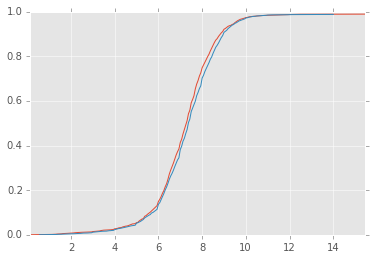

In [35]:
firstscdf.plot()
otherscdf.plot()

In [36]:
def get_week_from_cdf(acdf):
    import random
    pval = random.uniform(0,100)/100.0
    try:
        return acdf[acdf >= pval].head(1).index[0]
    except:
        return acdf.index[0]

In [37]:
a = get_week_from_cdf(firstscdf)

In [38]:
a

6.8125

In [39]:
def get_samples(acdf, size):
    import random
    import pandas as pd
    a = list()
    for i in range(size):
        b = get_week_from_cdf(acdf)
        a.append(b)
    c = pd.Series(a)
    return c

In [40]:
firstssamples = get_samples(firstscdf, 200000)

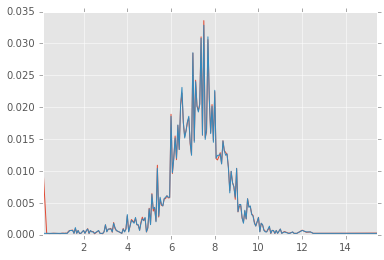

In [41]:
firstssamples.value_counts(normalize=True).sort_index().plot()
firstspmf.plot()

In [42]:
otherssamples = get_samples(otherscdf, 200000)

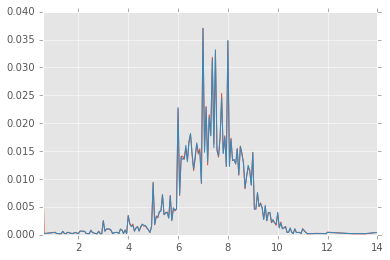

In [43]:
otherssamples.value_counts(normalize=True).sort_index().plot()
otherspmf.plot()

In [44]:
firstssamplesarray = firstssamples.values

In [45]:
otherssamplesarray = otherssamples.values

In [46]:
(otherssamplesarray > firstssamplesarray).mean()

0.51929999999999998

In [47]:
(firstssamplesarray > otherssamplesarray)[:5]

array([ True, False, False, False,  True], dtype=bool)

In [48]:
firsts.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'religion_i',         u'metro_i',         u'basewgt',
       u'adj_mod_basewgt',        u'finalwgt',          u'secu_p',
                  u'sest',         u'cmintvw',     u'totalwgt_lb',
           u'totalwgt_kg'],
      dtype='object', length=245)

## Chapter 2 Distributions

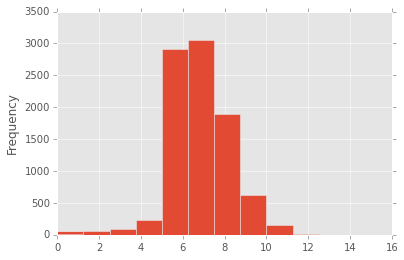

In [49]:
df['birthwgt_lb'].plot(kind='hist',bins=12)

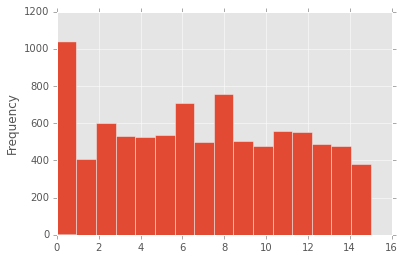

In [50]:
df['birthwgt_oz'].plot(kind='hist',bins=16)

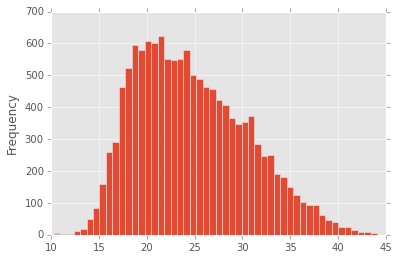

In [51]:
df['agepreg'].plot(kind='hist', bins=50)

In [52]:
preg = nsfg.ReadFemPreg()

In [53]:
live = preg[preg.outcome == 1]

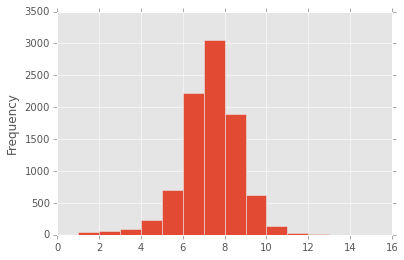

In [54]:
live['birthwgt_lb'].plot(kind='hist',bins=15)

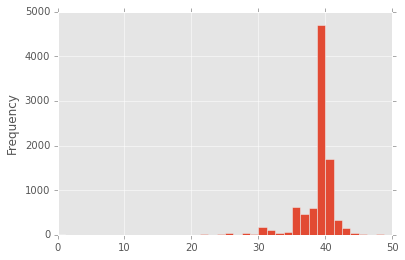

In [55]:
live['prglngth'].plot(kind='hist',bins=40)

In [56]:
live['prglngth'].value_counts().sort_index()

0        1
4        1
9        1
13       1
17       2
18       1
19       1
20       1
21       2
22       7
23       1
24      13
25       3
26      35
27       3
28      32
29      21
30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [57]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

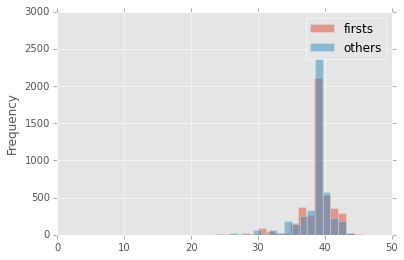

In [58]:
firsts['prglngth'].plot(kind='hist',alpha=0.5,bins=40,label='firsts')
others['prglngth'].plot(kind='hist',alpha=0.5,bins=40,label='others')
plt.legend()

In [59]:
print(live.prglngth.mean())
print(live.prglngth.var())
print(live.prglngth.std())

38.5605596852
7.30266206783
2.70234381007


In [60]:
print(firsts.prglngth.mean(), others.prglngth.mean())

38.6009517335 38.5229144667


In [61]:
(firsts.prglngth.mean() - others.prglngth.mean())*168.

13.11026081862832

In [62]:
def CohenEffectSize(group1, group2):
    import math
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1*var1 + n2*var2)/(n1+n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [63]:
d = CohenEffectSize(firsts.prglngth, others.prglngth)

In [64]:
d

0.028879044654449883

In [65]:
dweight = CohenEffectSize(others.totalwgt_lb, firsts.totalwgt_lb)

In [66]:
dweight

0.088672927072602

In [67]:
from scipy.stats import beta

In [68]:
AL_PA = 91837
NL_PA = 91790

AL_HR = 2634
NL_HR = 2275

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_AL = beta(alpha_prior + AL_HR, beta_prior + AL_PA - AL_HR)

posterior_NL = beta(alpha_prior + NL_HR, beta_prior + NL_PA - NL_HR)


samples = 200000

samples_posterior_AL = posterior_AL.rvs(samples)

samples_posterior_NL = posterior_NL.rvs(samples)

print((samples_posterior_AL > samples_posterior_NL).mean())

1.0


(0.02, 0.04)

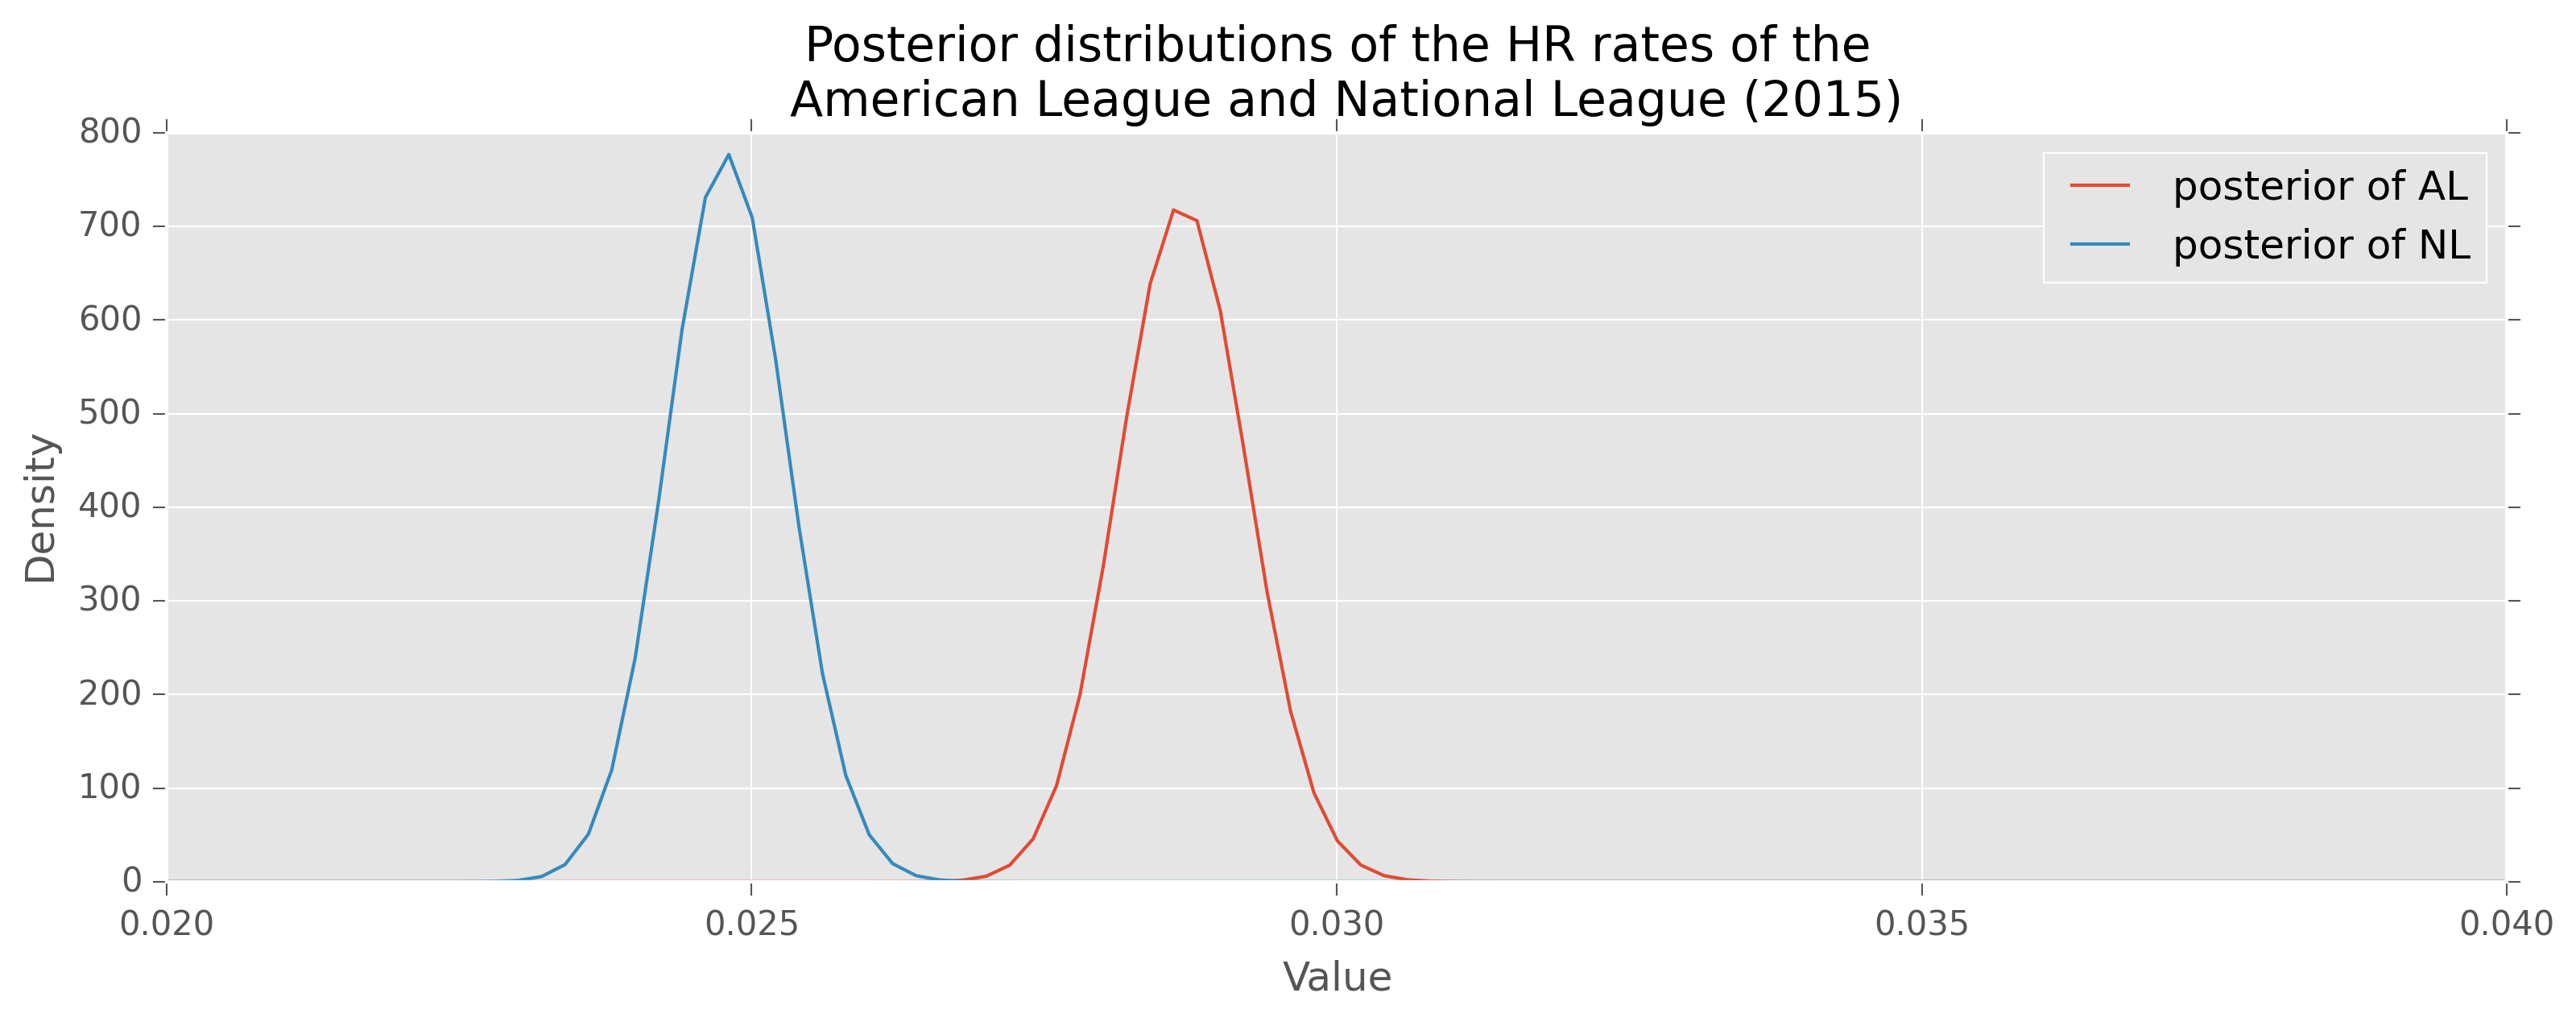

In [69]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 5000)
plt.plot(x, posterior_AL.pdf(x), label='posterior of AL')
plt.plot(x, posterior_NL.pdf(x), label='posterior of NL')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of the HR rates of the \n American League and National League (2015)")
plt.legend()
plt.xlim(0.02, 0.04)

In [70]:
dbaseball = CohenEffectSize(samples_posterior_AL, samples_posterior_NL)

In [71]:
dbaseball

7.3072007859697985

In [72]:
PROTON_TOTAL = 503
GAMMA_TOTAL = 1591

PROTON_SECOND = 32
GAMMA_SECOND = 203

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_proton = beta(alpha_prior + PROTON_SECOND, beta_prior + PROTON_TOTAL - PROTON_SECOND)

posterior_gamma = beta(alpha_prior + GAMMA_SECOND, beta_prior + GAMMA_TOTAL - GAMMA_SECOND)


samples = 2000000

samples_posterior_proton = posterior_proton.rvs(samples)

samples_posterior_gamma = posterior_gamma.rvs(samples)

print((samples_posterior_gamma > samples_posterior_proton).mean())

0.999982


(0.02, 0.2)

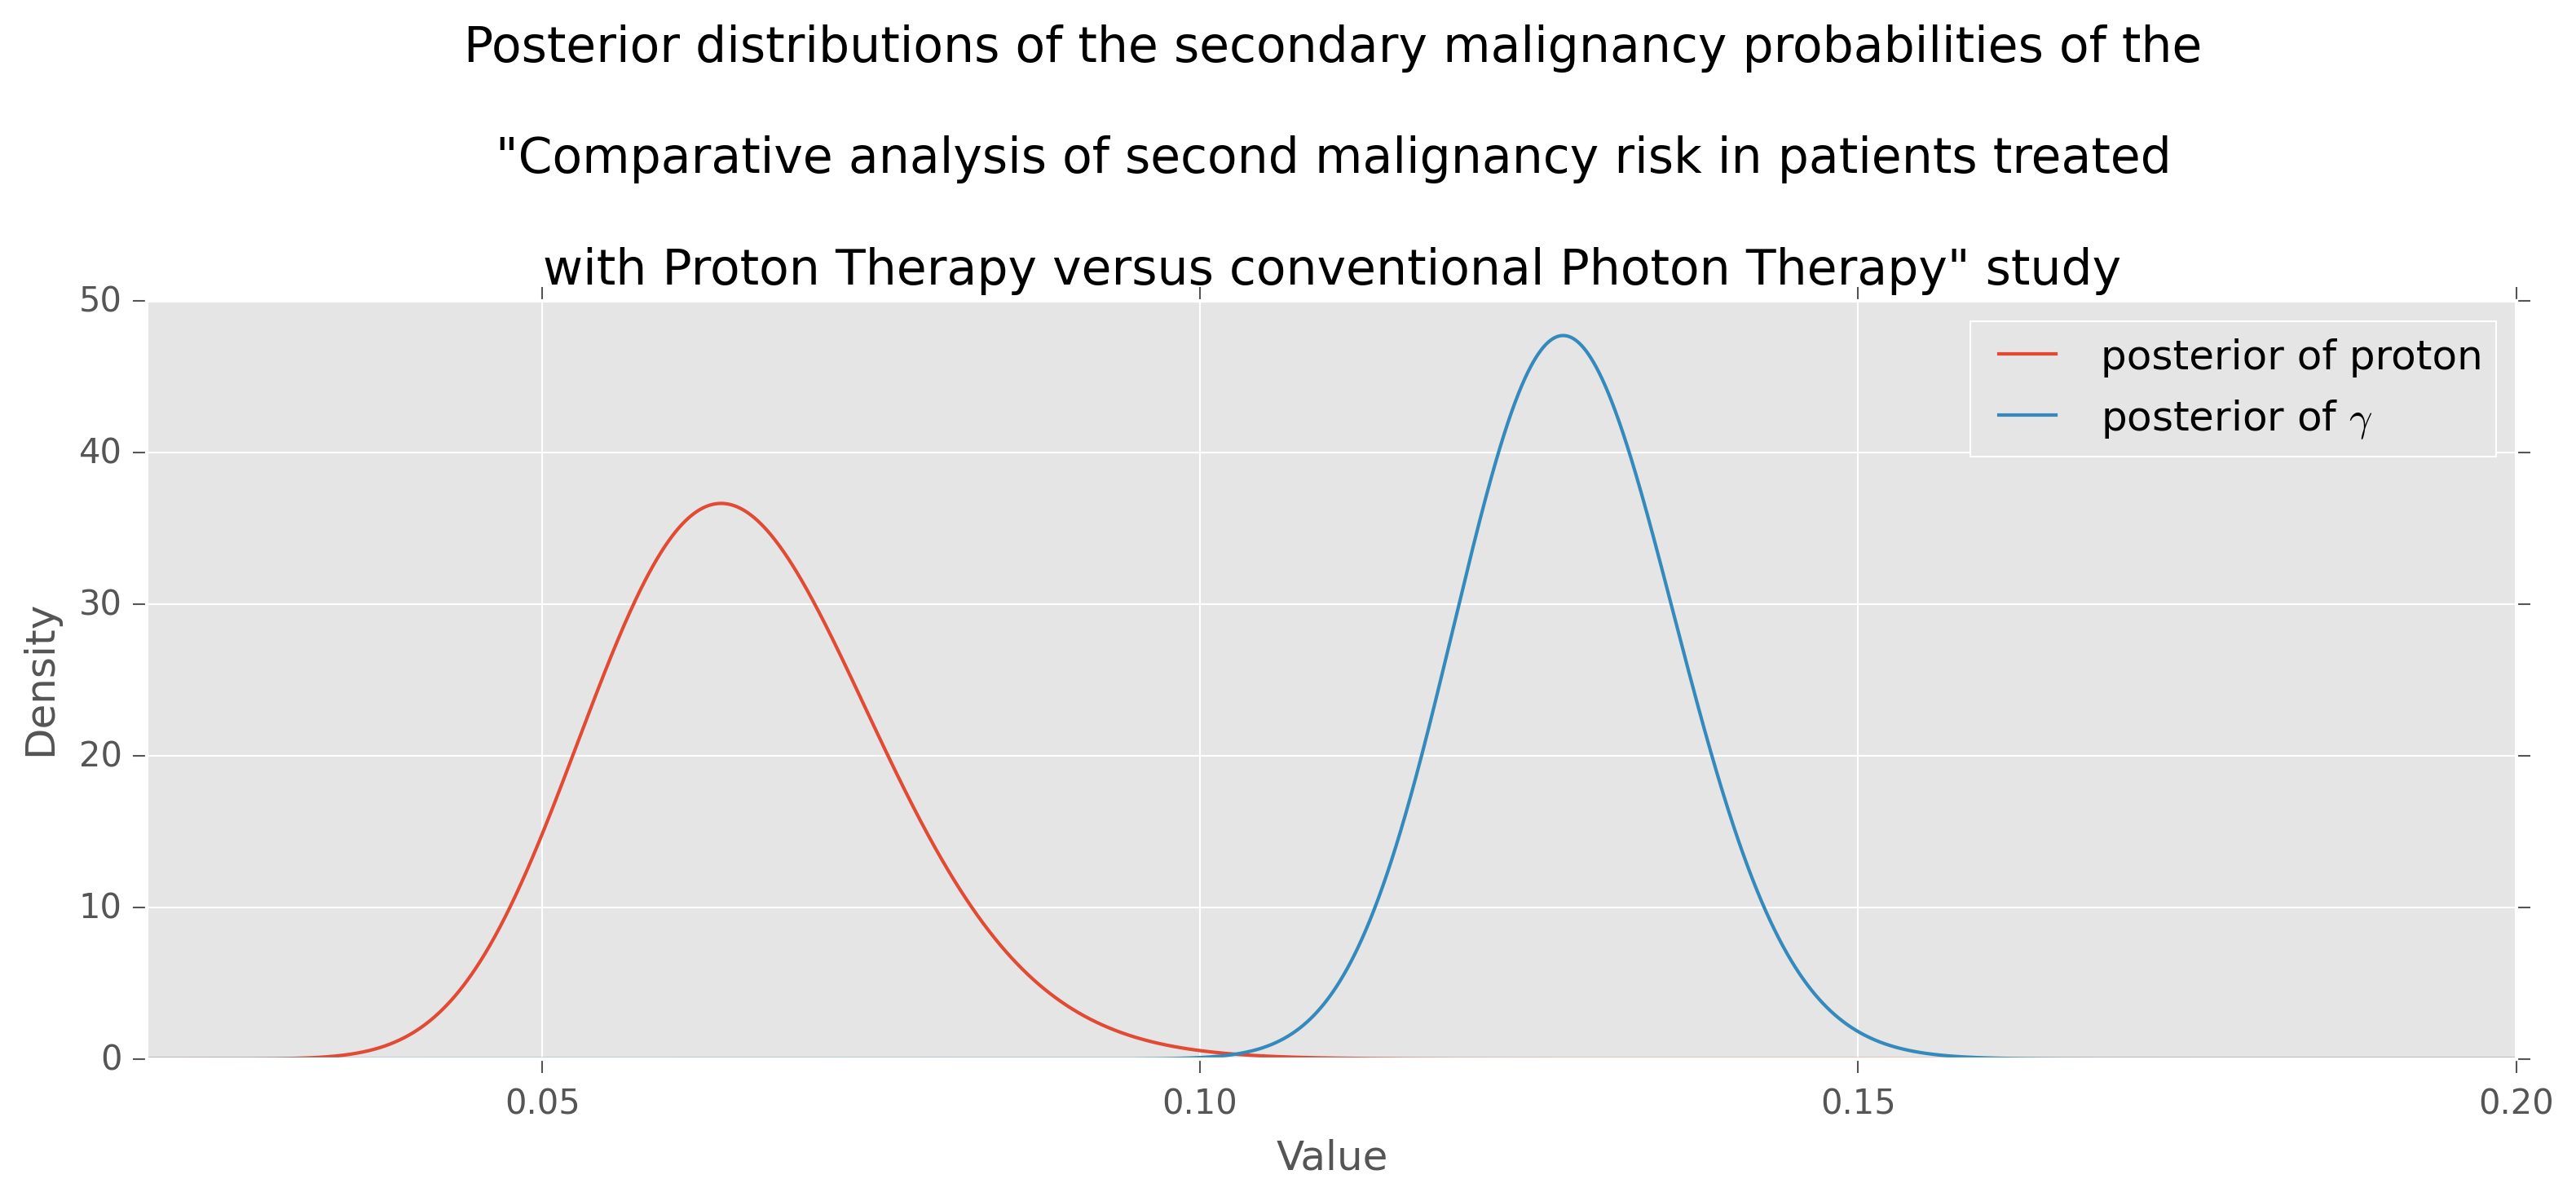

In [73]:

%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 50000)
plt.plot(x, posterior_proton.pdf(x), label='posterior of proton')
plt.plot(x, posterior_gamma.pdf(x), label='posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distributions of the secondary malignancy probabilities of the \n
"Comparative analysis of second malignancy risk in patients treated \n
with Proton Therapy versus conventional Photon Therapy" study""")
plt.legend()
plt.xlim(0.02,0.2)

(array([  3.15035477e-05,   1.57517739e-04,   5.46061494e-04,
          1.65918685e-03,   4.88304990e-03,   1.21813718e-02,
          2.55913819e-02,   4.83054398e-02,   8.80524159e-02,
          1.41818471e-01,   2.12711954e-01,   3.05647420e-01,
          4.09756144e-01,   5.29837167e-01,   6.47187882e-01,
          7.73506607e-01,   8.85764249e-01,   9.77187544e-01,
          1.05043329e+00,   1.11093061e+00,   1.14099549e+00,
          1.14558451e+00,   1.12224038e+00,   1.09074733e+00,
          1.04176982e+00,   9.74877284e-01,   9.01221989e-01,
          8.23880780e-01,   7.46245537e-01,   6.70027954e-01,
          5.91983165e-01,   5.20984670e-01,   4.59153707e-01,
          3.99517491e-01,   3.40973398e-01,   2.89570109e-01,
          2.48342467e-01,   2.12218399e-01,   1.77879532e-01,
          1.48969776e-01,   1.28124929e-01,   1.04213736e-01,
          8.78003875e-02,   7.28677059e-02,   5.94156910e-02,
          4.99961302e-02,   4.08180967e-02,   3.33937606e-02,
        

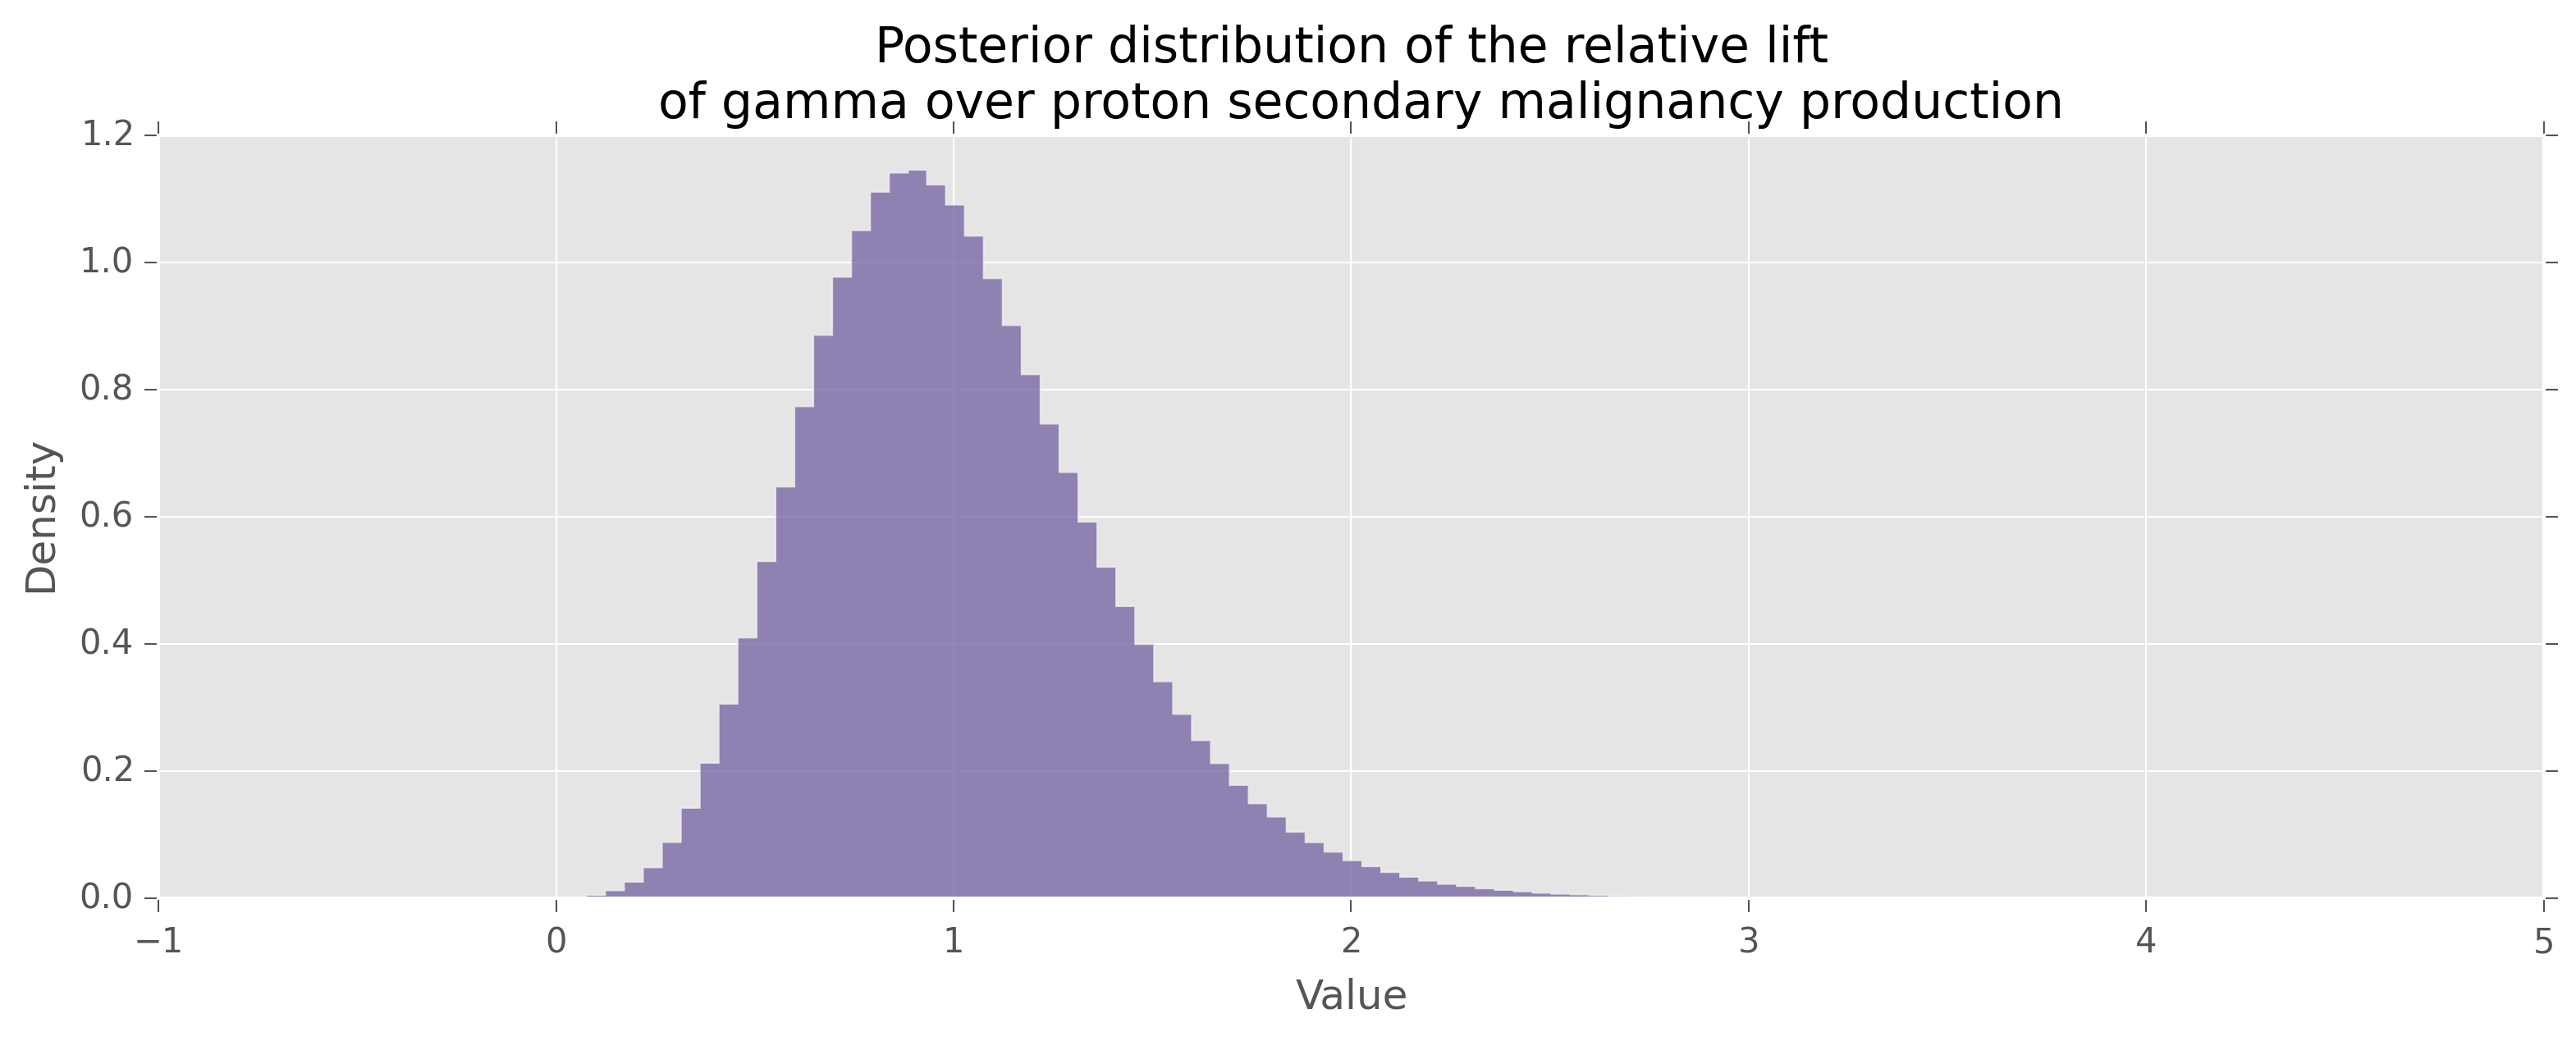

In [74]:
def relative_increase(a,b):
    return (a-b)/b

posterior_rel_increase = relative_increase(samples_posterior_gamma,
     samples_posterior_proton)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distribution of the relative lift \n of gamma over proton secondary malignancy production""")

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=100, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)

95% confidence interval:  0.40694044569 0.97459329616 1.8714587104
95% confidence interval length:  1.46451826471


C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


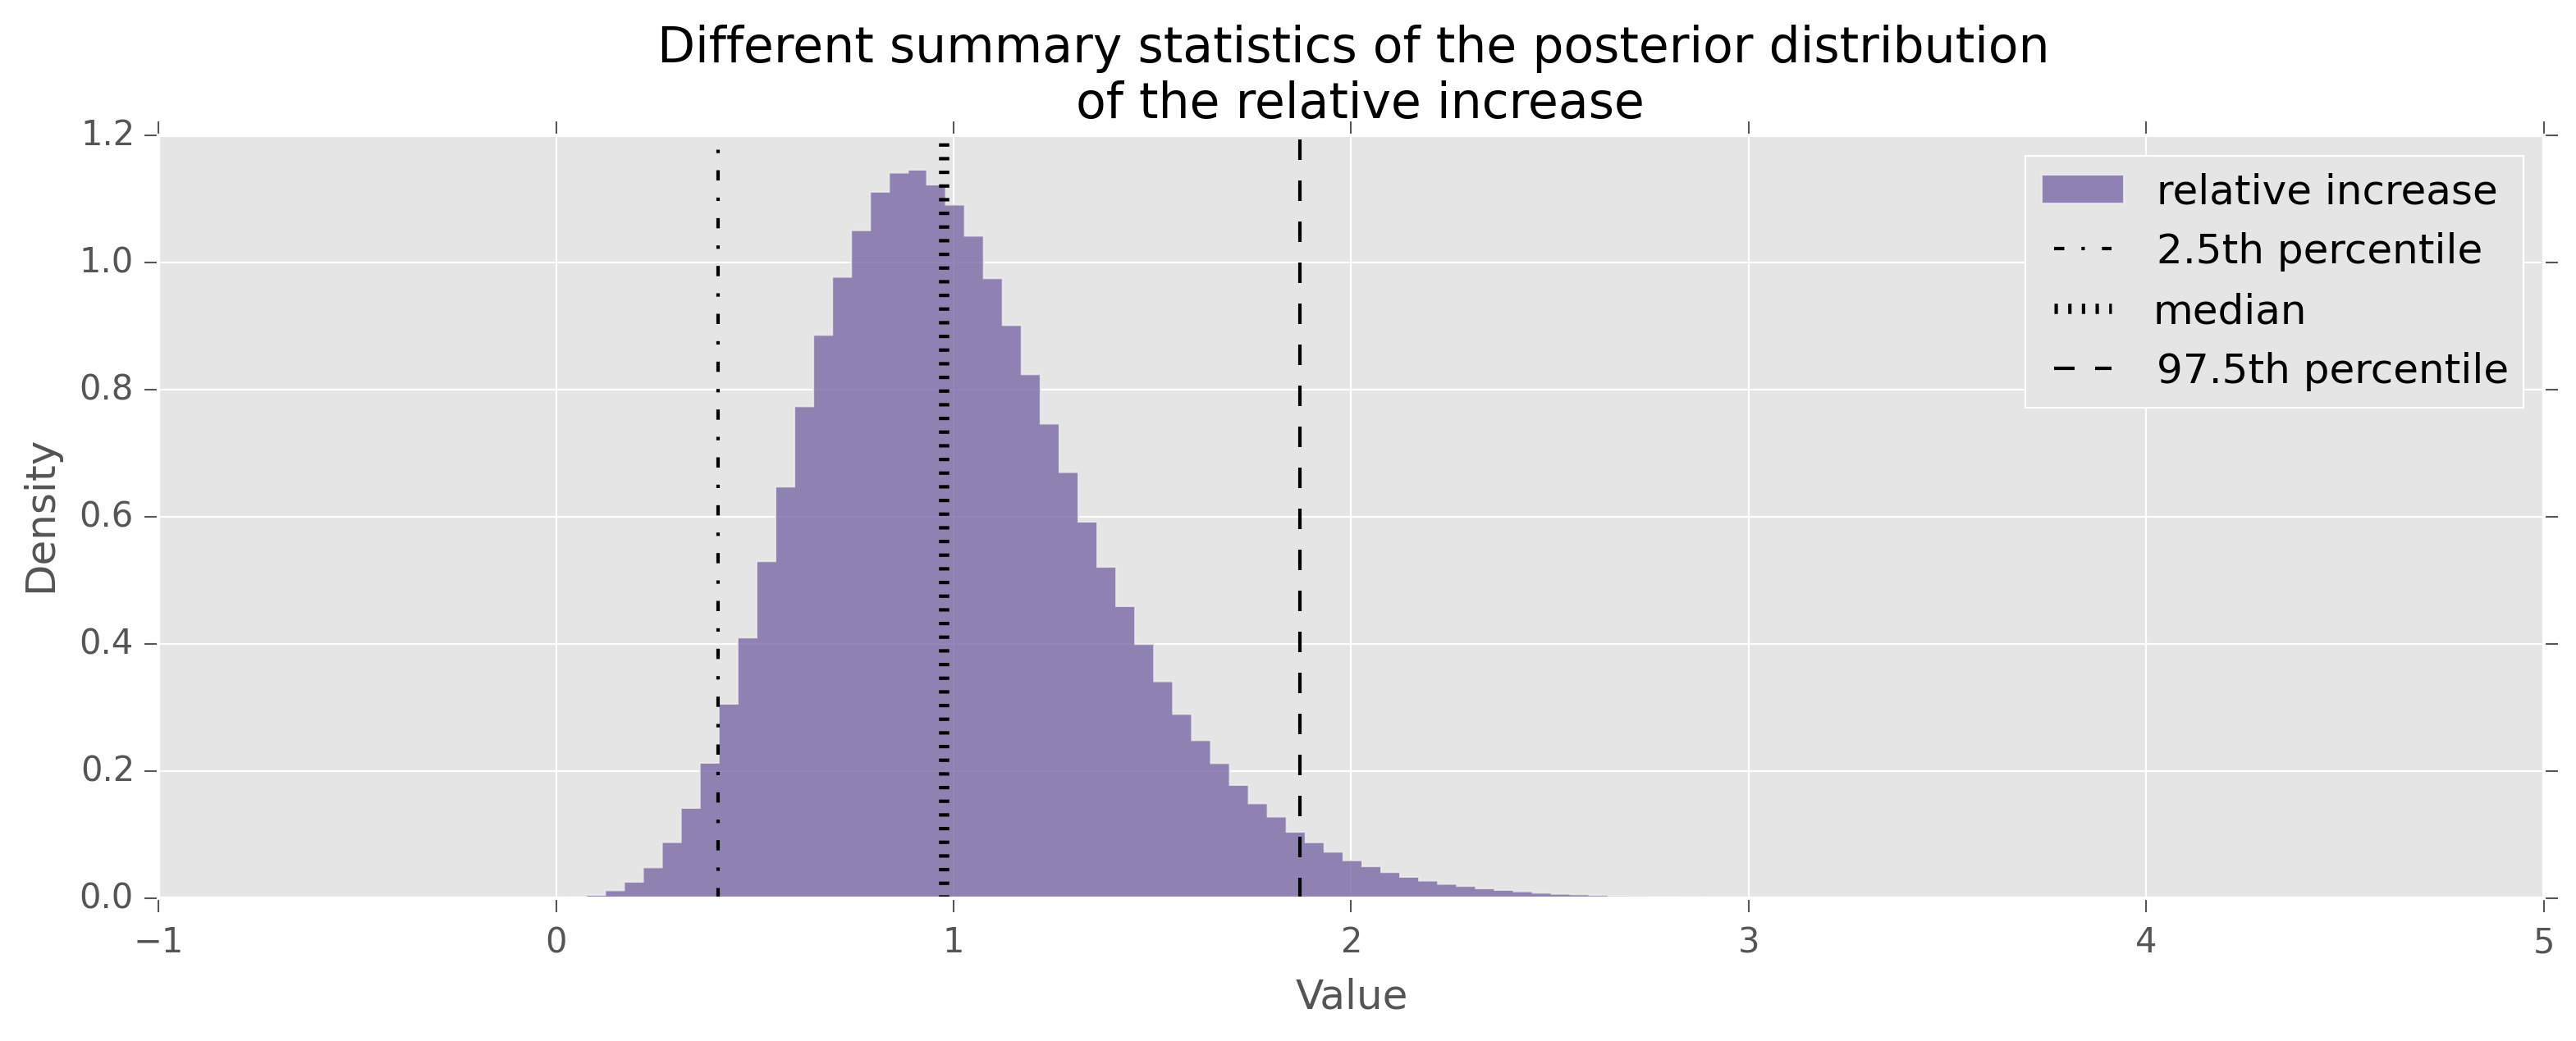

In [75]:
mean = posterior_rel_increase.mean()
median = np.percentile(posterior_rel_increase, 50)
conservative_percentile = np.percentile(posterior_rel_increase, 30)

low, med, high = np.percentile(posterior_rel_increase, 2.5), np.percentile(posterior_rel_increase, 50), \
                np.percentile(posterior_rel_increase, 97.5)

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=100, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)


plt.vlines(low, 0, 1.2, linestyles='-.', label='2.5th percentile')
plt.vlines(median, 0, 1.2, linestyles=':', label='median', lw=3)
plt.vlines(high, 0, 1.2, linestyles='--',
           label='97.5th percentile')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Different summary statistics of the posterior distribution \n of the relative increase")

plt.legend();

print("95% confidence interval: ", low, med, high)
print("95% confidence interval length: ", high - low)

In [76]:
dtrial = CohenEffectSize(samples_posterior_gamma, samples_posterior_proton)

In [77]:
dtrial  # a very large effect

6.4199276189286811

In [78]:
firsts['prglngth'].mode()

0    39
dtype: int64

## Chapter 3 Probablity mass functions

In [79]:
import pandas as pd

In [103]:
dtest = pd.DataFrame({'firsts_prglngth': firsts.prglngth.value_counts(normalize=True).sort_index(),
                     'others_prglngth':others.prglngth.value_counts(normalize=True).sort_index() })

In [108]:
dtest.loc[20:46]

,firsts_prglngth,others_prglngth
20,0.000227,NaN
21,0.000227,0.000211
22,0.000680,0.000845
23,0.000227,NaN
24,0.001586,0.001267
25,0.000227,0.000422
26,0.003626,0.004013
27,0.000227,0.000422
28,0.005438,0.001690
29,0.002039,0.002534


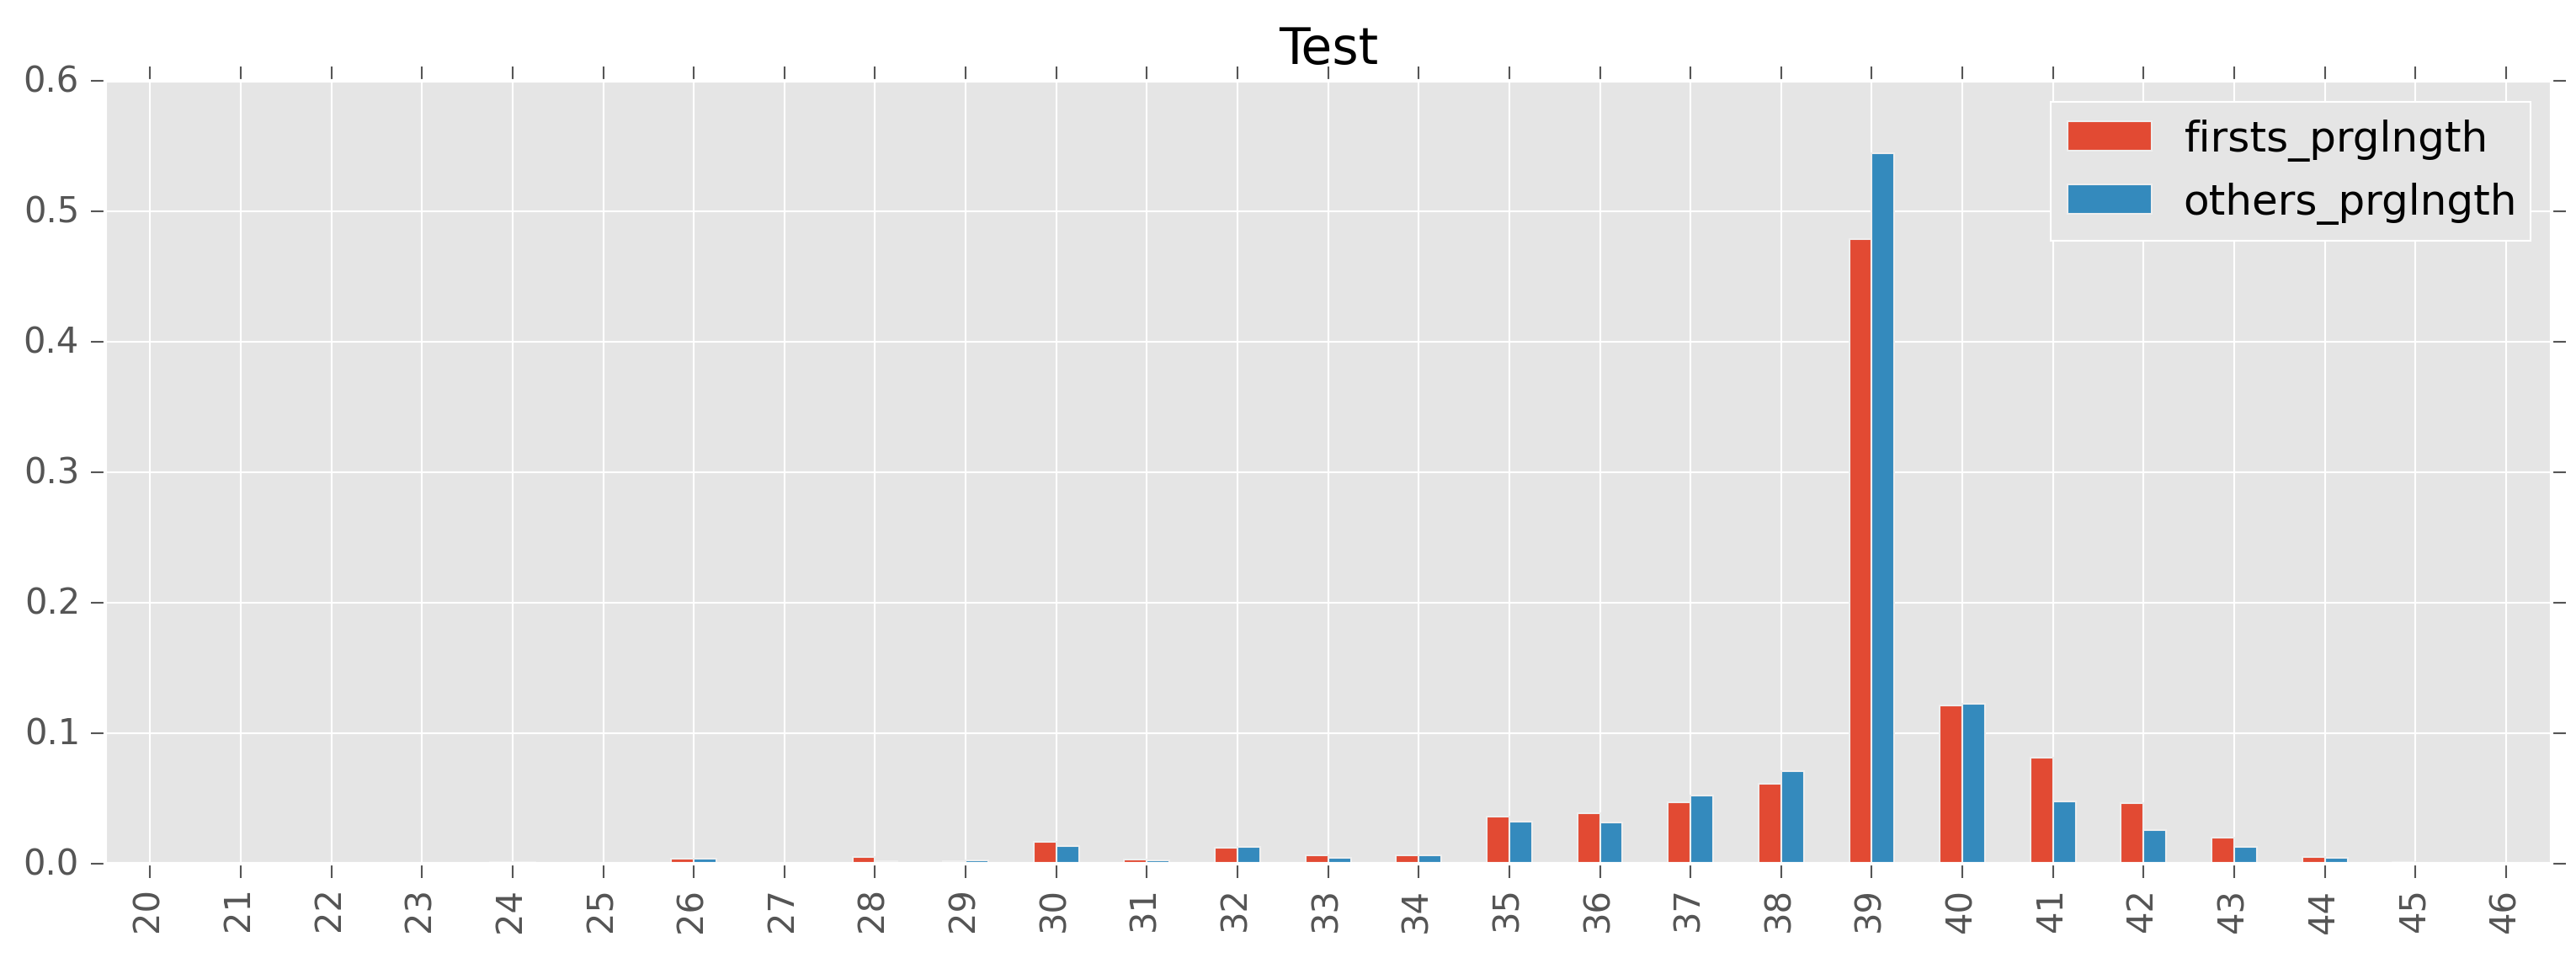

In [109]:
dtest.loc[20:46].plot.bar()
#plt.xlim = ((35,46))
plt.title('Test')
#plt.xlim(35,46)

In [110]:
dtest['delta'] = 100*(dtest['firsts_prglngth'] - dtest['others_prglngth'])

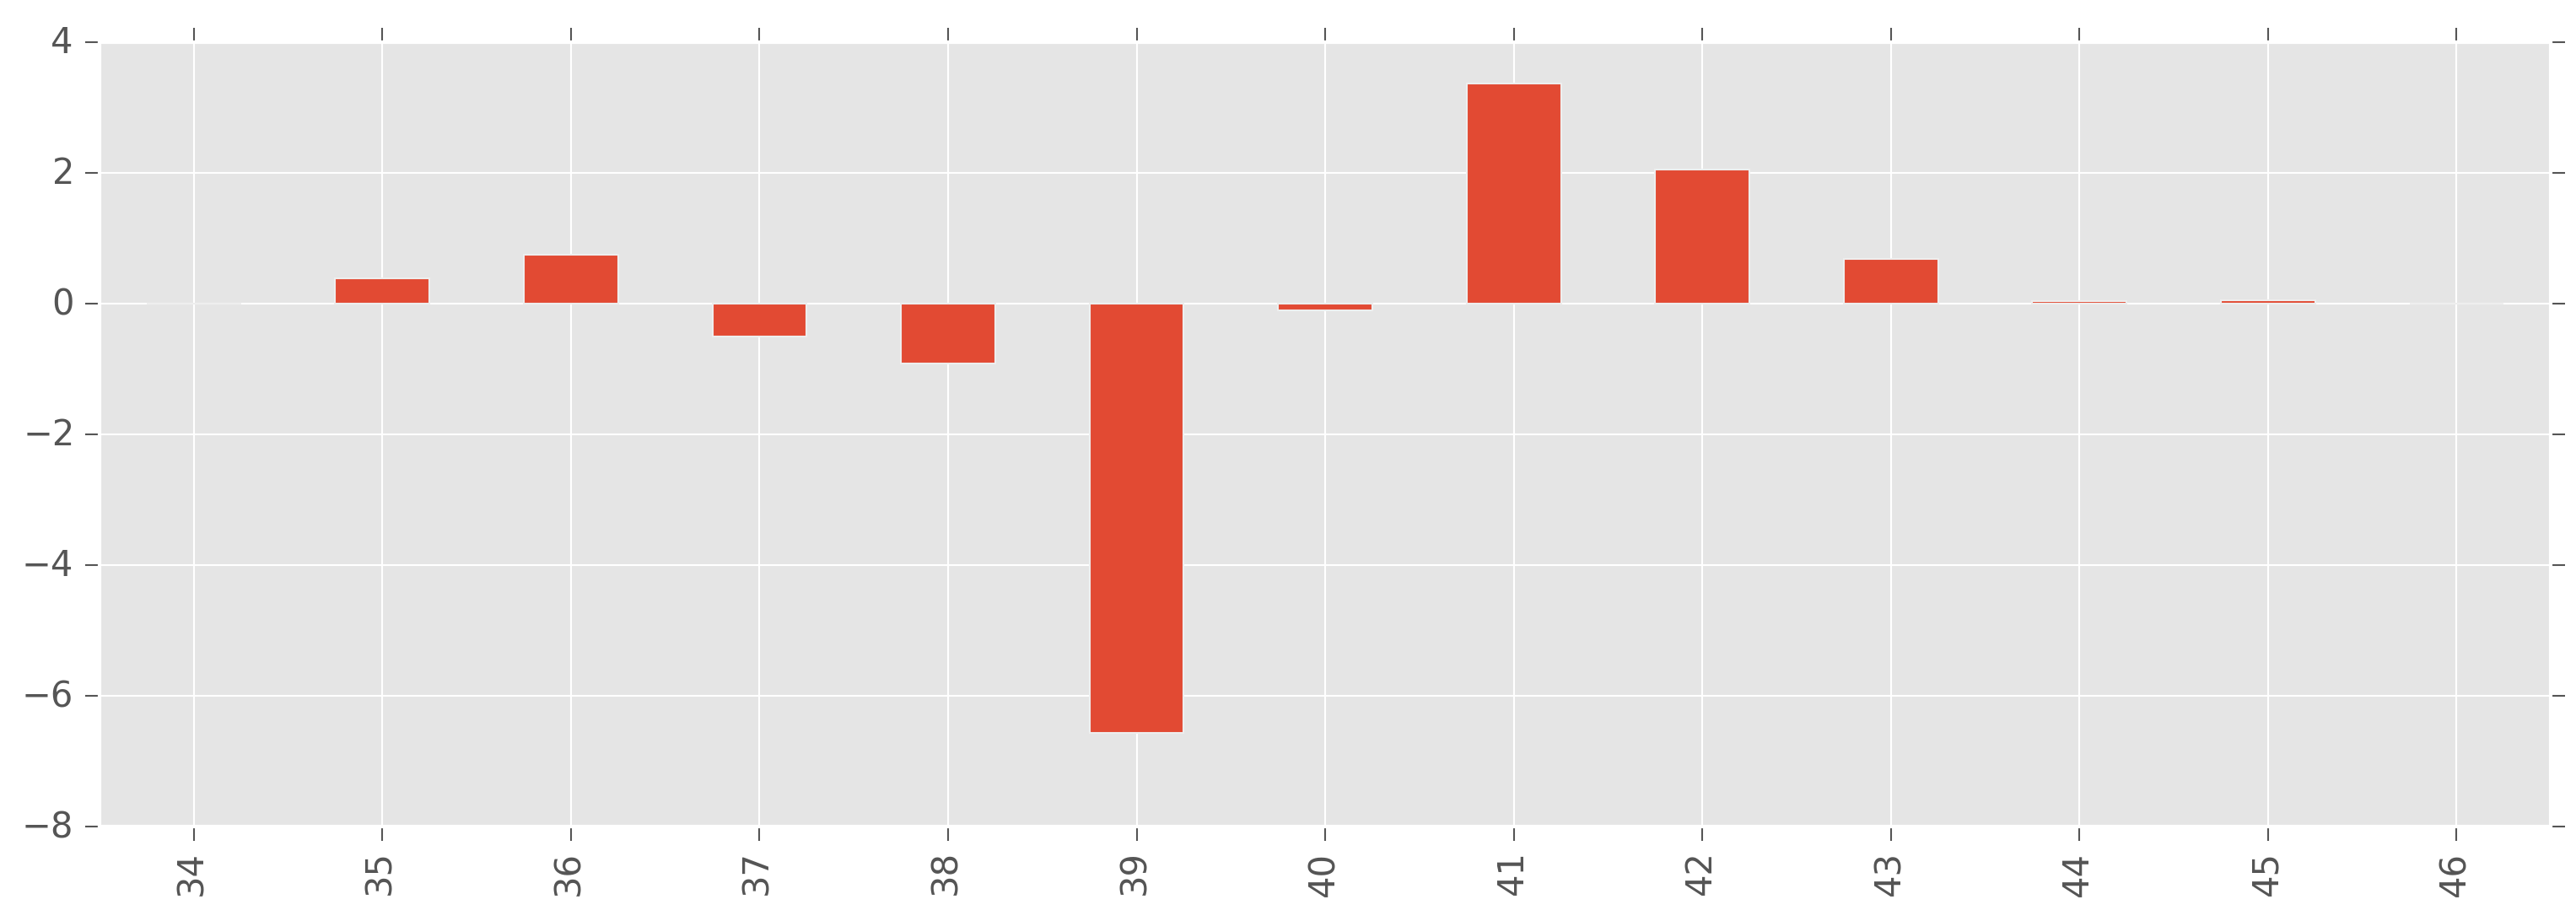

In [111]:
dtest.delta.loc[34:46].plot(kind='bar')

### 3.4 The class size paradox

In [141]:
 d = { 7: 8., 12: 8, 17: 14, 22: 4, 
          27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

In [142]:
dclasses = pd.DataFrame({'classcount': d.values(),
                        'classize': d.keys()}, index=d.keys())

In [143]:
dclasses

,classcount,classize
32,12,32
17,14,17
37,8,37
22,4,22
7,8,7
42,3,42
27,6,27
12,8,12
47,2,47


In [144]:
(dclasses['classize']*dclasses['classcount']).sum()/(dclasses['classcount'].sum())

23.692307692307693

But if you survey a group of students, ask them how many students are in their classes, and compute the mean, you would think the average class was bigger. Let's see how much bigger.

In [145]:
dclasses['prob'] = dclasses['classcount']/dclasses['classcount'].sum()

In [146]:
dclasses

,classcount,classize,prob
32,12,32,0.184615
17,14,17,0.215385
37,8,37,0.123077
22,4,22,0.061538
7,8,7,0.123077
42,3,42,0.046154
27,6,27,0.092308
12,8,12,0.123077
47,2,47,0.030769


In [149]:
dclasses['biasedprob'] = dclasses['prob']*dclasses['classize']
dclasses['biasedprob'] = dclasses['biasedprob']/dclasses['biasedprob'].sum()

In [150]:
dclasses

,classcount,classize,prob,biasedprob
32,12,32,0.184615,0.249351
17,14,17,0.215385,0.154545
37,8,37,0.123077,0.192208
22,4,22,0.061538,0.057143
7,8,7,0.123077,0.036364
42,3,42,0.046154,0.081818
27,6,27,0.092308,0.105195
12,8,12,0.123077,0.062338
47,2,47,0.030769,0.061039


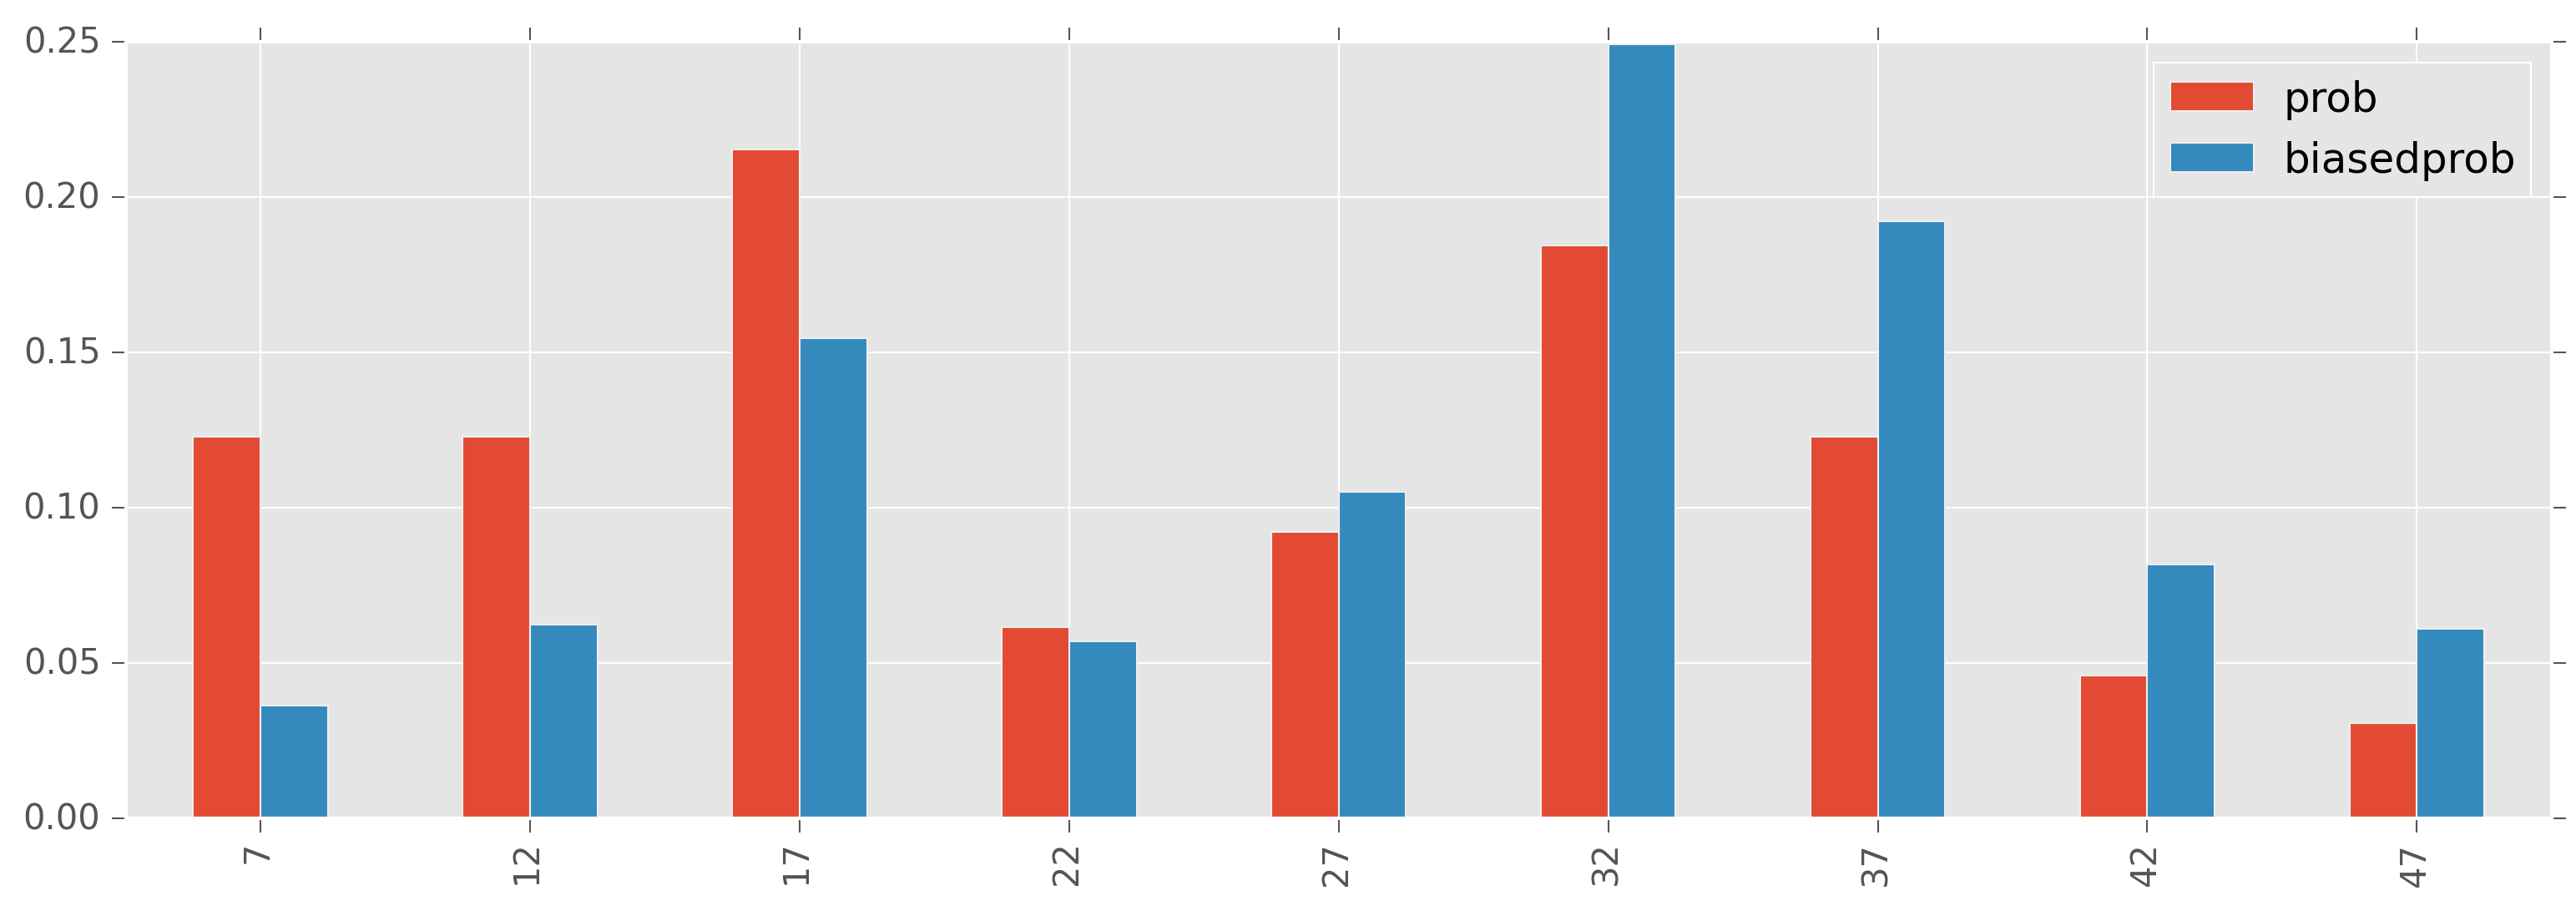

In [152]:
dclasses[['prob','biasedprob']].sort_index().plot(kind='bar')

In [153]:
(dclasses['classize']*dclasses['classcount']).sum()/(dclasses['classcount'].sum())

23.692307692307693

In [154]:
dclasses

,classcount,classize,prob,biasedprob
32,12,32,0.184615,0.249351
17,14,17,0.215385,0.154545
37,8,37,0.123077,0.192208
22,4,22,0.061538,0.057143
7,8,7,0.123077,0.036364
42,3,42,0.046154,0.081818
27,6,27,0.092308,0.105195
12,8,12,0.123077,0.062338
47,2,47,0.030769,0.061039


In [155]:
(dclasses['prob']*dclasses['classize']).sum()

23.6923076923077

In [156]:
(dclasses['biasedprob']*dclasses['classize']).sum()

29.123376623376615

In the biased distribution there are fewer small classes and more large ones. The mean of the biased distribution is 29.1, almost 25% higher than the actual mean.
It is also possible to invert this operation. Suppose you want to find the distribution of class sizes at a college, but you can’t get reliable data from the Dean. An alternative is to choose a random sample of students and ask how many students are in their classes.

In [157]:
import numpy as np
array = np.random.randn(4,2)

In [158]:
df = pd.DataFrame(array)

In [159]:
df

,0,1
0,0.181877,1.275219
1,-0.164867,1.080991
2,0.009825,0.903109
3,-0.148905,-0.534407


In [160]:
columns = ['A', 'B']
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,0.181877,1.275219
1,-0.164867,1.080991
2,0.009825,0.903109
3,-0.148905,-0.534407


In [161]:
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(array, columns=columns, index=index)

In [162]:
df

,A,B
a,0.181877,1.275219
b,-0.164867,1.080991
c,0.009825,0.903109
d,-0.148905,-0.534407


In [163]:
df['A']

a    0.181877
b   -0.164867
c    0.009825
d   -0.148905
Name: A, dtype: float64

In [164]:
df.loc['a']

A    0.181877
B    1.275219
Name: a, dtype: float64

In [165]:
df.iloc[0]

A    0.181877
B    1.275219
Name: a, dtype: float64

In [168]:
indices = ['a','c']
df.loc[indices]

,A,B
a,0.181877,1.275219
c,0.009825,0.903109


In [170]:
df['a':'c']

,A,B
a,0.181877,1.275219
b,-0.164867,1.080991
c,0.009825,0.903109


In [171]:
df[0:2]

,A,B
a,0.181877,1.275219
b,-0.164867,1.080991


My advice: if your rows have labels that are not simple integers, use the labels consistently and avoid using integer positions.